In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv('amazon_top50_books.csv')

In [3]:
df

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,"17,350",$8.00,$8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,"2,052",$22.00,$22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,"18,979",$15.00,$15,2018,Non Fiction
3,1984,George Orwell,4.7,"70,425",$7.48,$8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,"21,424",$6.00,$6,2017,Fiction
...,...,...,...,...,...,...,...,...
645,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,"9,413",$8.00,$8,2019,Fiction
646,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,"14,331",$8.00,$8,2016,Non Fiction
647,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,"14,331",$8.00,$8,2017,Non Fiction
648,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,"14,331",$8.00,$8,2018,Non Fiction


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         650 non-null    object 
 1   Author       650 non-null    object 
 2   User Rating  650 non-null    float64
 3   Reviews      650 non-null    object 
 4   Price        650 non-null    object 
 5   Price_r      650 non-null    object 
 6   Year         650 non-null    int64  
 7   Genre        650 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 40.8+ KB


In [5]:
df.drop(['Price'],axis=1,inplace=True)
df['Reviews']=df['Reviews'].str.replace(',',"").astype(int)
df.head()

,Name,Author,User Rating,Reviews,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,$8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,$22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,$15,2018,Non Fiction
3,1984,George Orwell,4.7,70425,$8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,21424,$6,2017,Fiction


In [6]:
df['Price_r']=df['Price_r'].str.strip('$').astype(int)
df.head()

,Name,Author,User Rating,Reviews,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984,George Orwell,4.7,70425,8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction


In [7]:
df.rename({'Price_r':'Price'},axis=1,inplace=True)

In [8]:
df.describe()

,User Rating,Reviews,Price,Year
count,650.000000,650.000000,650.000000,650.000000
mean,4.635385,17204.853846,12.796923,2015.000000
std,0.221517,20715.650579,10.168624,3.744539
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4789.250000,7.000000,2012.000000
50%,4.700000,9957.000000,11.000000,2015.000000
75%,4.800000,22359.250000,15.000000,2018.000000
max,4.900000,193482.000000,105.000000,2021.000000


In [9]:
#Popularity of Genre type
units_solds=df['Genre'].value_counts()

In [10]:
df.groupby('Genre')['User Rating'].mean()


Genre
Fiction        4.659233
Non Fiction    4.616529
Name: User Rating, dtype: float64

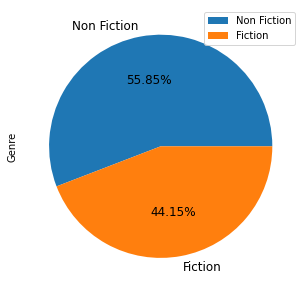

In [11]:
plt.figure(figsize=(5,6))
units_solds.plot.pie(autopct='%.2f%%',fontsize=12)
plt.legend()
plt.show()

In [12]:
#most bookes publish in which year


In [13]:
df['Year'].value_counts().head()

2016    50
2011    50
2018    50
2021    50
2017    50
Name: Year, dtype: int64

In [14]:
most=df[['Name','Reviews']].sort_values('Reviews',ascending=False).head()
most

,Name,Reviews
513,The Midnight Library: A Novel,193482
226,It Ends with Us: A Novel (1),141748
633,Where the Crawdads Sing,120727
455,The Four Winds: A Novel,117146
539,The Seven Husbands of Evelyn Hugo: A Novel,111053


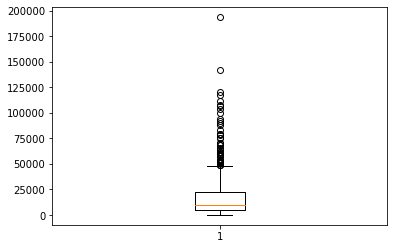

In [15]:
plt.boxplot(df["Reviews"])
plt.show()

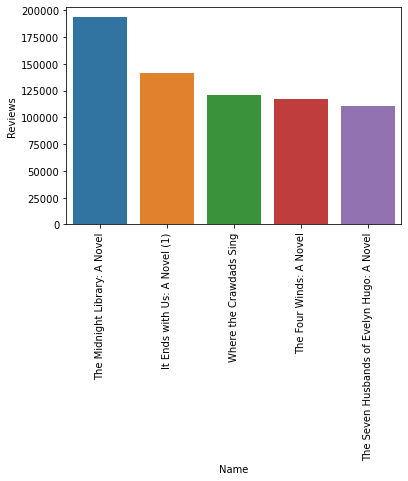

In [16]:
# fig=px.bar(most,x='Name',y='Reviews',height=400)
# fig.show()
import seaborn as sns
sns.barplot(data=most,x='Name', y='Reviews')
plt.xticks(rotation=90)
plt.show()

In [17]:
#min 5 rated books
least=df[['Name','Reviews']].sort_values('Reviews',ascending=True).head()
least

,Name,Reviews
96,Divine Soul Mind Body Healing and Transmission...,37
361,Soul Healing Miracles: Ancient and New Sacred ...,220
143,George Washington's Sacred Fire,408
605,True Compass: A Memoir,438
430,The Daily Show with Jon Stewart Presents Earth...,440


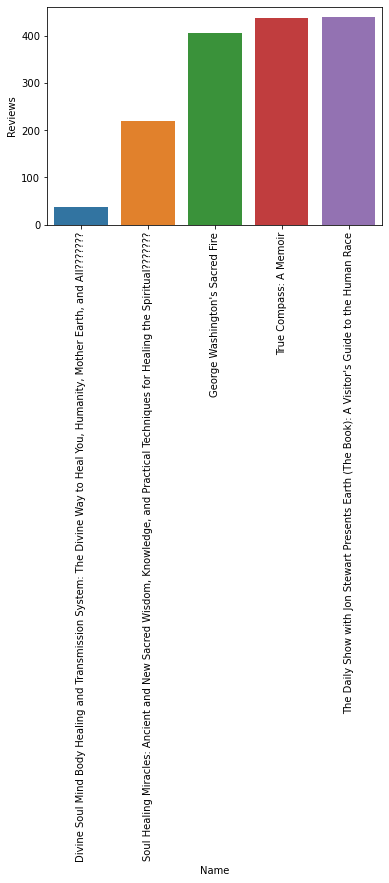

In [18]:
sns.barplot(data=least,x='Name', y='Reviews')
plt.xticks(rotation=90)
plt.show()

In [19]:
#max price 
max_price=df.groupby('Author')['Price'].agg([max]).sort_values('max',ascending=False).rename({'max':'Book_Price'},axis=1).head(5)
max_price

,Book_Price
Author,
American Psychiatric Association,105
Stephenie Meyer,82
Lin-Manuel Miranda,54
Bill Simmons,53
J. K. Rowling,52


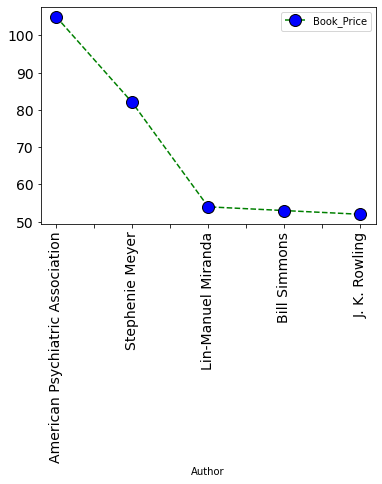

In [20]:
max_price.plot(marker='o',linestyle='--',ms=12,mec='black',mfc='b',color='green',fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [21]:
#maximum books published by
author=df['Author'].value_counts(ascending=False).head(10)
author


Jeff Kinney                           14
Gary Chapman                          13
Suzanne Collins                       12
American Psychological Association    11
Rick Riordan                          11
Dr. Seuss                             10
Dav Pilkey                             9
Eric Carle                             9
Gallup                                 9
Stephenie Meyer                        8
Name: Author, dtype: int64

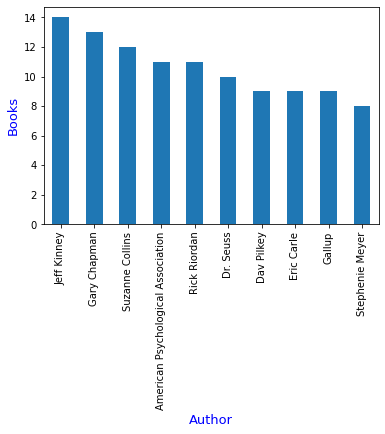

In [22]:
author.plot.bar()
plt.xlabel('Author',fontsize=13,color='b')
plt.ylabel('Books',fontsize=13,color='b')
plt.show()


In [23]:
#fiction books

In [24]:
fiction=df[df['Genre']=='Fiction']
fiction

,Name,Author,User Rating,Reviews,Price,Year,Genre
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
3,1984,George Orwell,4.7,70425,8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
6,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
7,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
...,...,...,...,...,...,...,...
641,Wonder,R. J. Palacio,4.8,21625,9,2014,Fiction
642,Wonder,R. J. Palacio,4.8,21625,9,2015,Fiction
643,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
644,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction


In [25]:
fiction.sort_values('User Rating',ascending = False).head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
645,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
576,The Wonderful Things You Will Be,Emily Winfield Martin,4.9,8842,10,2017,Fiction
569,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2019,Fiction
568,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2018,Fiction
566,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2016,Fiction


In [26]:
x=fiction['Price'].mean()
x

10.606271777003485

In [27]:
rev=fiction.groupby('Year')['Price'].mean()
rev

Year
2009    15.583333
2010     9.700000
2011    11.619048
2012    12.285714
2013    10.708333
2014    10.172414
2015     9.352941
2016    12.631579
2017     8.833333
2018     8.761905
2019     9.350000
2020     8.478261
2021    10.208333
Name: Price, dtype: float64

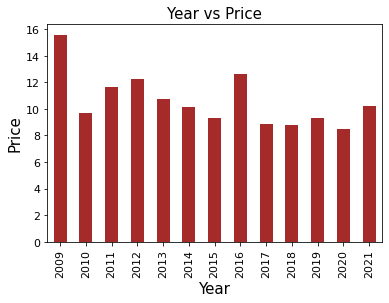

In [28]:
rev.plot.bar(fontsize=11,color='brown')
plt.xlabel('Year',fontsize=15)

plt.ylabel('Price',fontsize=15)
plt.title('Year vs Price',fontsize=15)
plt.show()

In [29]:
c=fiction.corr()
c

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.157143,-0.126591,0.257783
Reviews,-0.157143,1.000000,0.023643,0.422138
Price,-0.126591,0.023643,1.000000,-0.158740
Year,0.257783,0.422138,-0.158740,1.000000


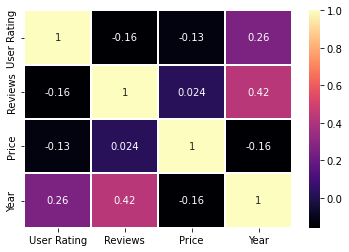

In [37]:
sns.heatmap(c,annot=True, cmap = 'magma', linewidth = 0.10)
plt.show()

In [ ]:
#non-fiction

In [90]:
non_fiction=df[df['Genre']!='Fiction']
non_fiction

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
5,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
9,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
12,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction
...,...,...,...,...,...,...,...
639,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
646,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
647,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
648,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [91]:
y=non_fiction['Price'].mean()
y

14.52892561983471

In [92]:
non_fiction.sort_values(by='User Rating',ascending = False).head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
230,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2013,Non Fiction
231,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2014,Non Fiction
233,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2016,Non Fiction
614,Unfreedom of the Press,Mark R. Levin,4.9,5956,11,2019,Non Fiction
293,Obama: An Intimate Portrait,Pete Souza,4.9,3192,22,2017,Non Fiction


In [111]:
yearly_sale=non_fiction.groupby('Year')['Price'].mean()
yearly_sale

Year
2009    15.230769
2010    16.000000
2011    17.620690
2012    17.482759
2013    18.192308
2014    20.809524
2015    10.969697
2016    13.516129
2017    13.730769
2018    11.793103
2019    10.566667
2020    13.037037
2021    12.346154
Name: Price, dtype: float64

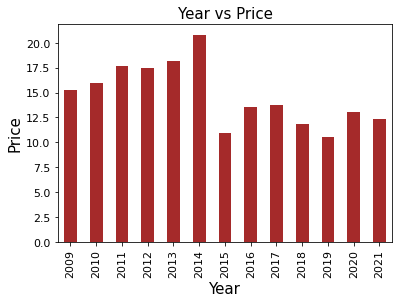

In [145]:
yearly_sale.plot.bar(fontsize=11,color='brown')
plt.xlabel('Year',fontsize=15)

plt.ylabel('Price',fontsize=15)
plt.title('Year vs Price',fontsize=15)
plt.show()


In [146]:
f=fiction.corr()
f

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.157143,-0.126591,0.257783
Reviews,-0.157143,1.000000,0.023643,0.422138
Price,-0.126591,0.023643,1.000000,-0.158740
Year,0.257783,0.422138,-0.158740,1.000000


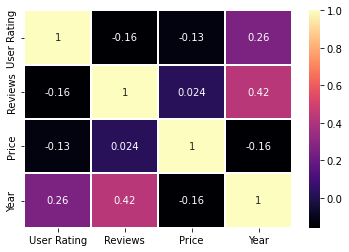

In [147]:
sns.heatmap(f,annot=True, cmap = 'magma', linewidth = 0.01)
plt.show()

In [ ]:
#non-fiction books are more popular as compare to fiction.
#price of non-fiction books are higher then fiction books means non-fiction books generating more revenue.
#huge dip seen in fiction books after 2014.

In [ ]:
df.open_csv('')